In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier,plot_tree
import warnings
warnings.filterwarnings('ignore')

In [31]:
df = pd.read_csv('penguins.csv')
df.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [32]:
df.drop(['Unnamed: 0', 'year'], axis = 1, inplace = True)

In [33]:
df.sample(4)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
282,Chinstrap,Dream,46.1,18.2,178.0,3250.0,female
107,Adelie,Biscoe,38.2,20.0,190.0,3900.0,male
172,Gentoo,Biscoe,50.2,14.3,218.0,5700.0,male
123,Adelie,Torgersen,41.4,18.5,202.0,3875.0,male


## Preprocessing :

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [35]:
df.shape

(344, 7)

In [36]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [37]:
df.duplicated().sum()

0

In [38]:
df.dropna(subset=['bill_depth_mm', 'bill_length_mm', 'flipper_length_mm', 'body_mass_g'], inplace=True)

In [39]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
dtype: int64

In [40]:
# assign numerical value to the boolen value of sex column
def binarize_sex(val):
    if val == 'Male':
        return 1
    else:
        return 0 

In [41]:
df['sex'] = df['sex'].apply(binarize_sex)

In [42]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [43]:
df['species'].value_counts()

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [44]:
df['island'].value_counts()

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

## EDA :

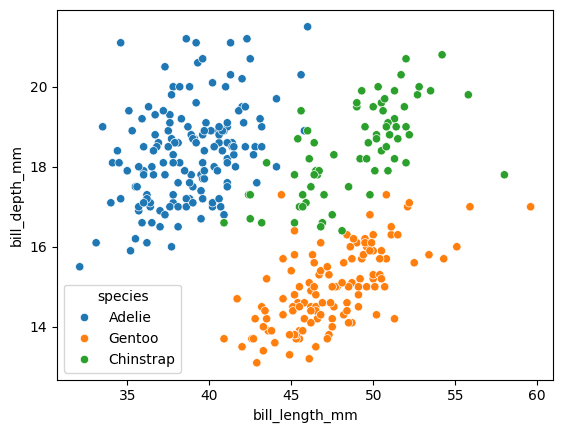

In [45]:
sns.scatterplot(x = 'bill_length_mm', y = 'bill_depth_mm', data = df,hue = 'species')
plt.show()

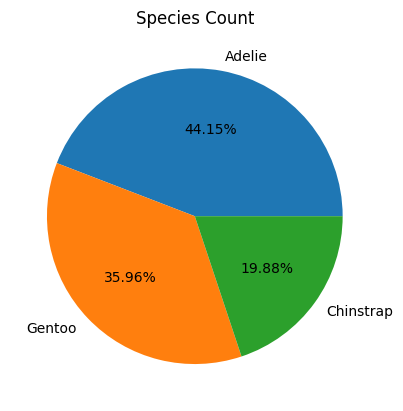

In [55]:
plt.pie(df['species'].value_counts(),labels=['Adelie','Gentoo','Chinstrap'],autopct='%.2f%%')
plt.title('Species Count')
plt.show()

## Model Building :

In [47]:
pd.get_dummies(df)  # One Hot Encoding [Species, Island]

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,0,True,False,False,False,False,True
1,39.5,17.4,186.0,3800.0,0,True,False,False,False,False,True
2,40.3,18.0,195.0,3250.0,0,True,False,False,False,False,True
4,36.7,19.3,193.0,3450.0,0,True,False,False,False,False,True
5,39.3,20.6,190.0,3650.0,0,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,0,False,True,False,False,True,False
340,43.5,18.1,202.0,3400.0,0,False,True,False,False,True,False
341,49.6,18.2,193.0,3775.0,0,False,True,False,False,True,False
342,50.8,19.0,210.0,4100.0,0,False,True,False,False,True,False


In [48]:
X = pd.get_dummies(df.drop('species', axis = 1), drop_first = True)
y = df['species']

In [49]:
X.sample(4)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Dream,island_Torgersen
207,45.0,15.4,220.0,5050.0,0,False,False
102,37.7,16.0,183.0,3075.0,0,False,False
312,47.6,18.3,195.0,3850.0,0,True,False
54,34.5,18.1,187.0,2900.0,0,False,False


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)
X_train.shape , X_test.shape

((239, 7), (103, 7))

In [51]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [52]:
y_pred = dt.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        50
   Chinstrap       0.95      1.00      0.97        18
      Gentoo       1.00      0.97      0.99        35

    accuracy                           0.98       103
   macro avg       0.98      0.98      0.98       103
weighted avg       0.98      0.98      0.98       103



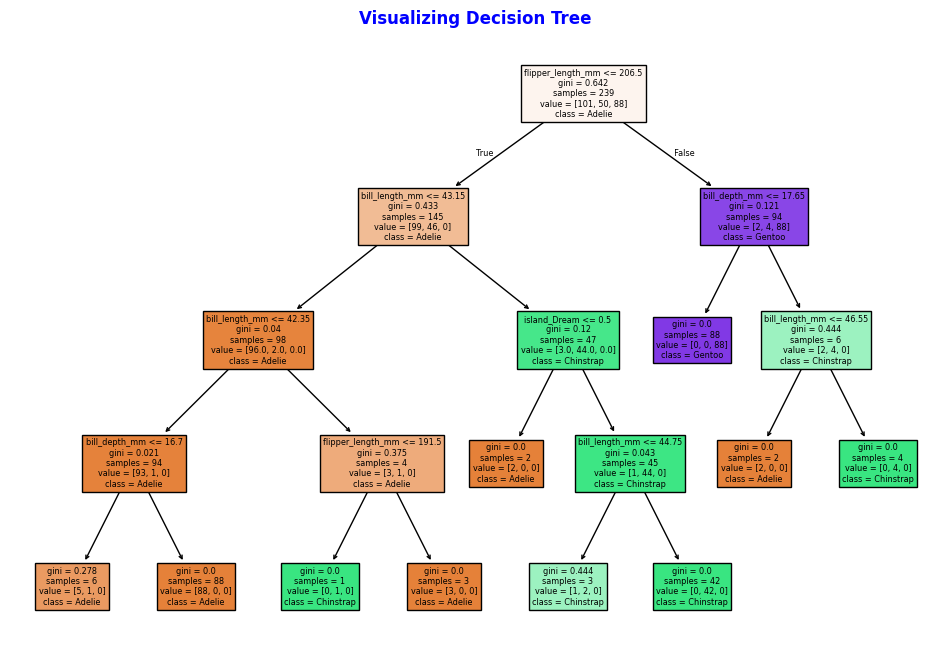

In [53]:
plt.figure(figsize = (12, 8))
plot_tree(dt, filled = True, feature_names = X.columns, class_names = dt.classes_)
plt.title("Visualizing Decision Tree",fontweight='bold',color='blue')
plt.show()

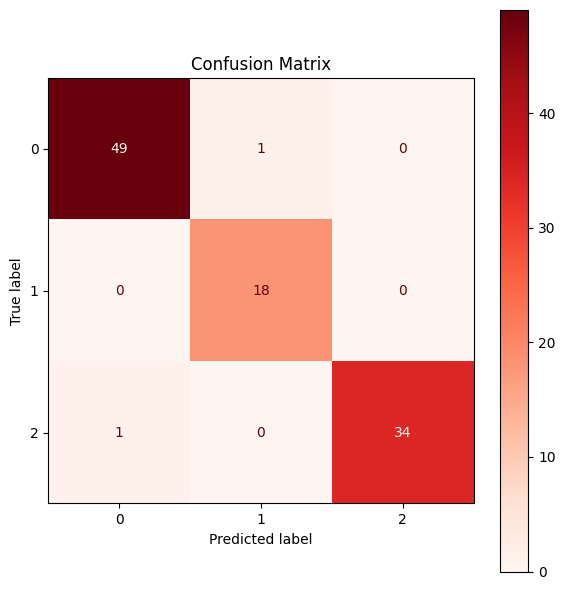

In [54]:
cm = confusion_matrix(y_test, y_pred)
fig_cm, ax_cm = plt.subplots(figsize=(6,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(ax=ax_cm, cmap=plt.cm.Reds, colorbar=True)  
ax_cm.set_title("Confusion Matrix")
plt.tight_layout()
plt.show()